# Quick exploration 2t.FLOAT - Mosaic of ~100x100 chunks

In [1]:
import os
import json 
import subprocess
import importlib

import matplotlib.pyplot as plt
import xbitinfo as xb
import xarray as xr

import utils

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

---

In [37]:
# load data
path_to_data = 'data/2t.NC_FLOAT.nc'  # change this
ds_all = xr.open_dataset(path_to_data)
ds = ds_all.isel(time=10)

In [38]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 900, latitude: 451)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
    time       datetime64[ns] 2019-12-02T06:00:00
Data variables:
    t2m        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-22 20:39:28 GMT by grib_to_netcdf-2.23.0: grib_to_n...

In [39]:
ds.__setitem__('t2mc', ds.t2m- 273)

In [40]:
ds.t2mc.attrs = {'units': 'C', 'long_name': '2 metre temperature Celsius'}

<Axes: title={'center': 'Statistical distributions'}, xlabel='value', ylabel='Probability density'>

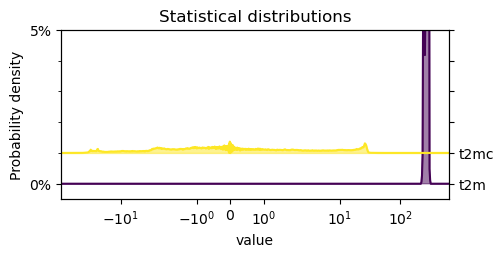

In [41]:
xb.plot_distribution(ds)

---

In [42]:
# get information content per bit
info_per_bit = xb.get_bitinformation(ds, dim="latitude", implementation="python")

  0%|          | 0/2 [00:00<?, ?it/s]

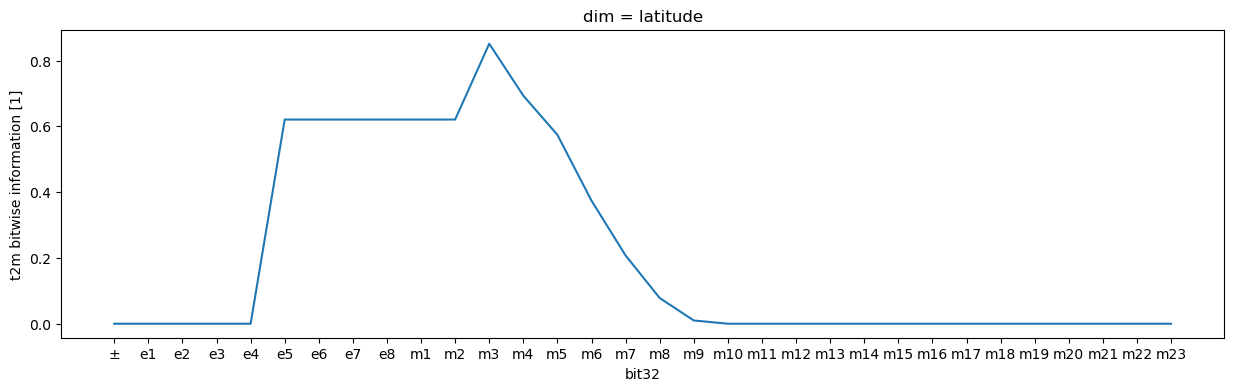

In [43]:
fig, ax = plt.subplots(figsize=(15, 4))
info_per_bit.t2m.plot(ax=ax)

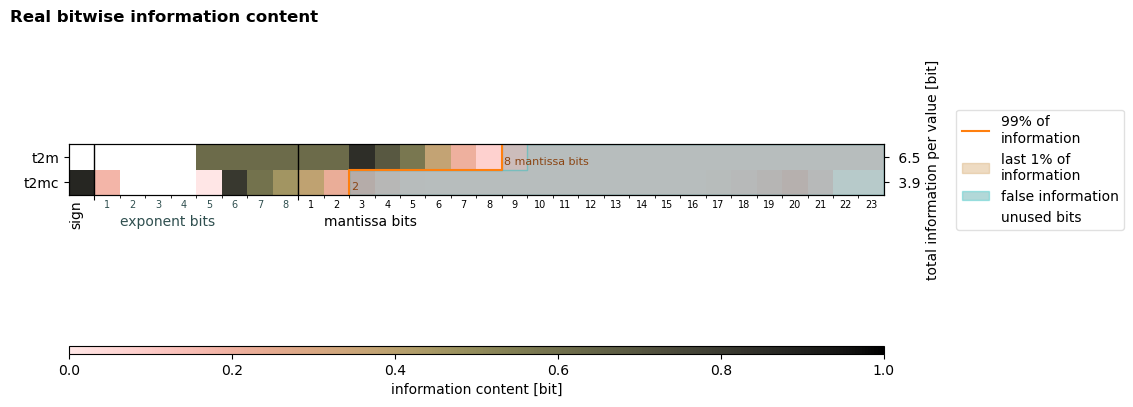

In [44]:
fig = xb.plot_bitinformation(info_per_bit)

In [45]:
# get keepbits
keepbits = xb.get_keepbits(info_per_bit, 0.99)

In [46]:
# apply bitrounding
ds_bitrounded = xb.xr_bitround(ds, keepbits)

---

In [47]:
at_least_zero = lambda x: max(x, 0)

In [48]:
chunk_long, chunk_lat = [100, 41] # for int division
vrbs = ['longitude', 'latitude']
var = 'latitude'

dss = []
dss_info_pbits = []
dss_bitrounded = []
dss_kbits = []

long_c = int(ds.longitude.size / chunk_long)
lat_c = int(ds.latitude.size / chunk_lat)


for i in range(long_c):
    for j in range(lat_c):
        temp_ds = ds.isel(longitude=slice(i*chunk_long, (i+1)*chunk_long),
                          latitude=slice(j*chunk_lat, (j+1)*chunk_lat))
        dss.append(temp_ds)
        temp_info_pbit = xb.get_bitinformation(temp_ds, dim=var, implementation="python")
        dss_info_pbits.append(temp_info_pbit)
        # fig = xb.plot_bitinformation(temp_info_pbit)
        temp_keepbits = xb.get_keepbits(temp_info_pbit, 0.99)
        # cope with negative keepbits
        temp_keepbits = temp_keepbits.map(at_least_zero)
        dss_kbits.append(temp_keepbits)
        temp_ds_bitrounded = xb.xr_bitround(temp_ds, temp_keepbits)
        dss_bitrounded.append(temp_ds_bitrounded)
        
    #     if j == 0: break
    # if i == 0: break

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

---

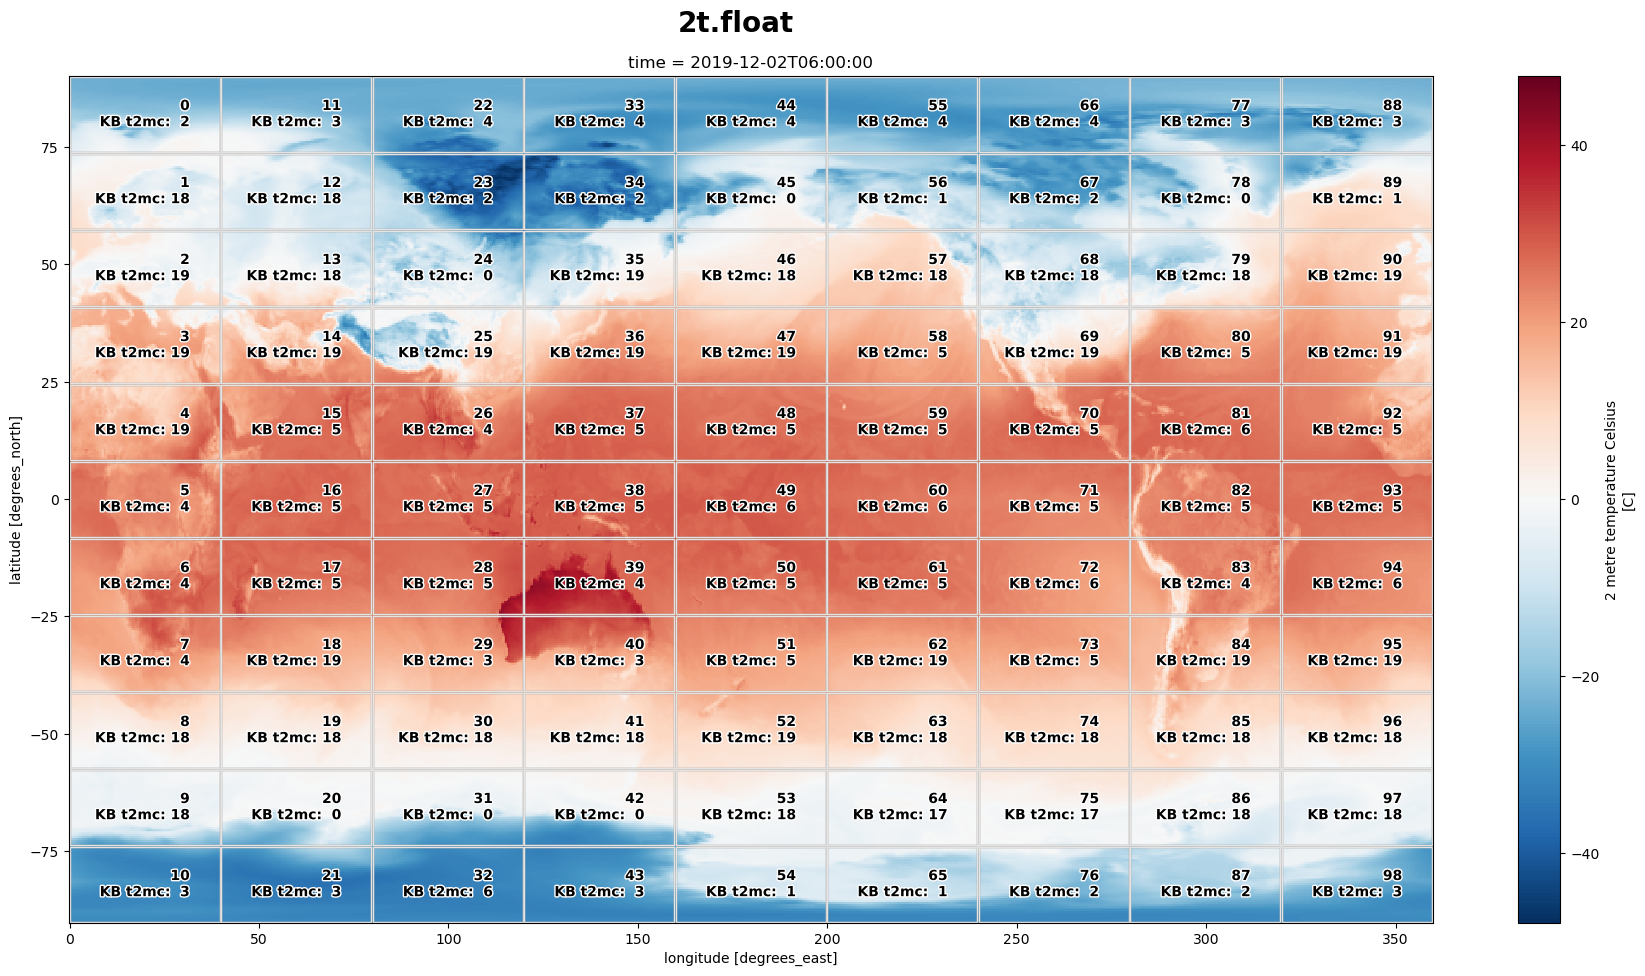

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

fig, ax = plt.subplots(figsize=(22, 11))
        
ds['t2mc'].plot(ax=ax)

for i in range(len(dss_bitrounded)):
    x = float(min(dss[i].longitude[0], dss[i].longitude[-1]))
    y = float(min(dss[i].latitude[0], dss[i].latitude[-1]))
    w = float(abs(dss[i].longitude[0] - dss[i].longitude[-1]))
    h = float(abs(dss[i].latitude[0] - dss[i].latitude[-1]))
    rect = mpl.patches.Rectangle((x, y), width = w, height = h,
                                facecolor = "none", edgecolor = "#E5E4E2",
                                path_effects=[pe.withStroke(linewidth=1, foreground="gray")],
                                label='xxx')
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    ax.annotate(
        f"""
        {i}
        KB t2mc: {int(dss_kbits[i].t2mc):2}
        """,
        # I: X{ratios[i]['comp']}
        # II: X{ratios[i]['bitr_comp']}
        # """,
        (cx+12, cy), color='k', weight='bold', fontsize=10, ha='right', va='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='w')]
    )
    
fig.text(.402, .92, '2t.float', weight='bold', fontsize=20)

fig.show()

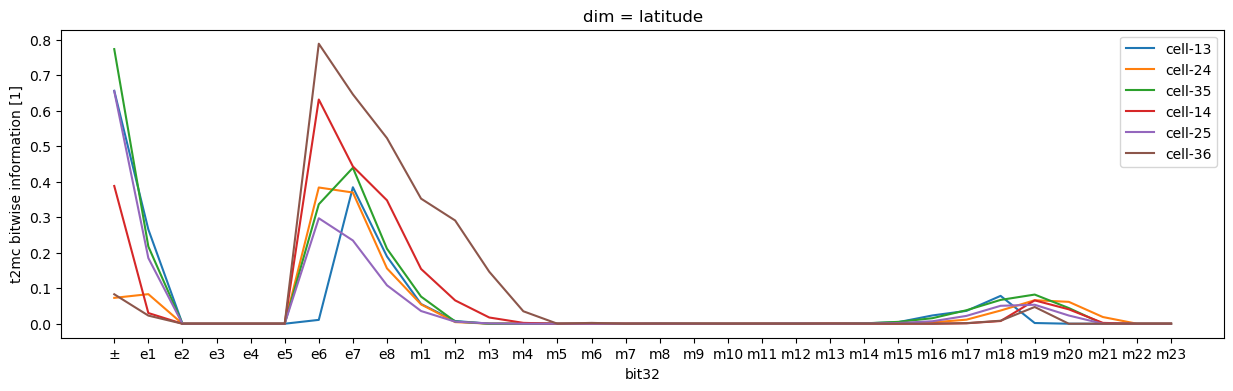

In [64]:
fig, ax = plt.subplots(figsize=(15, 4))
dss_info_pbits[13].t2mc.plot(ax=ax, label='cell-13')
dss_info_pbits[24].t2mc.plot(ax=ax, label='cell-24')
dss_info_pbits[35].t2mc.plot(ax=ax, label='cell-35')
dss_info_pbits[14].t2mc.plot(ax=ax, label='cell-14')
dss_info_pbits[25].t2mc.plot(ax=ax, label='cell-25')
dss_info_pbits[36].t2mc.plot(ax=ax, label='cell-36')
plt.legend()

In [59]:
import numpy as np

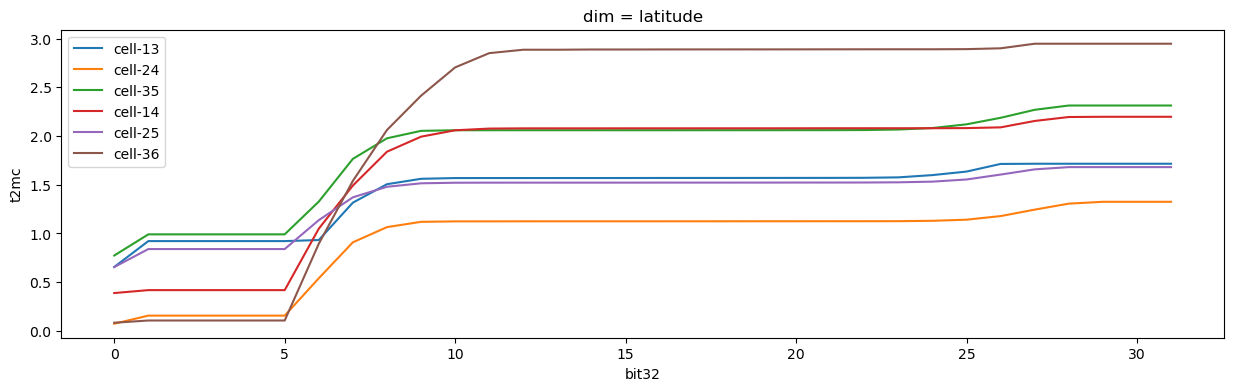

In [66]:
fig, ax = plt.subplots(figsize=(15, 4))
np.cumsum(dss_info_pbits[13]).t2mc.plot(ax=ax, label='cell-13')
np.cumsum(dss_info_pbits[24]).t2mc.plot(ax=ax, label='cell-24')
np.cumsum(dss_info_pbits[35]).t2mc.plot(ax=ax, label='cell-35')
np.cumsum(dss_info_pbits[14]).t2mc.plot(ax=ax, label='cell-14')
np.cumsum(dss_info_pbits[25]).t2mc.plot(ax=ax, label='cell-25')
np.cumsum(dss_info_pbits[36]).t2mc.plot(ax=ax, label='cell-36')
plt.legend()

In [62]:
np.cumsum(dss_info_pbits[13].t2mc)

<xarray.DataArray 't2mc' (bit32: 32)>
array([0.65563136, 0.92107163, 0.92107163, 0.92107163, 0.92107163,
       0.92107172, 0.93190814, 1.31603286, 1.50529862, 1.56074688,
       1.56839175, 1.5685402 , 1.56866396, 1.56869019, 1.56871312,
       1.56884462, 1.5692956 , 1.56938132, 1.56947163, 1.569732  ,
       1.56997716, 1.57017645, 1.57108427, 1.57548982, 1.59878594,
       1.63498775, 1.71338444, 1.71535943, 1.71535952, 1.71535952,
       1.71535952, 1.71535952])
Coordinates:
  * bit32    (bit32) <U3 '±' 'e1' 'e2' 'e3' 'e4' ... 'm20' 'm21' 'm22' 'm23'
    dim      <U8 'latitude'

In [58]:
dss_info_pbits[13].t2mc

<xarray.DataArray 't2mc' (bit32: 32)>
array([6.55631356e-01, 2.65440272e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.01909887e-08, 1.08364212e-02, 3.84124716e-01,
       1.89265765e-01, 5.54482579e-02, 7.64487209e-03, 1.48446791e-04,
       1.23763095e-04, 2.62276249e-05, 2.29359864e-05, 1.31499228e-04,
       4.50979631e-04, 8.57220167e-05, 9.03084967e-05, 2.60368588e-04,
       2.45156499e-04, 1.99290135e-04, 9.07826225e-04, 4.40554849e-03,
       2.32961201e-02, 3.62018111e-02, 7.83966828e-02, 1.97499194e-03,
       9.01909887e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])
Coordinates:
  * bit32    (bit32) <U3 '±' 'e1' 'e2' 'e3' 'e4' ... 'm20' 'm21' 'm22' 'm23'
    dim      <U8 'latitude'
Attributes:
    long_name:         t2mc bitwise information
    units:             1
    source_units:      C
    source_long_name:  2 metre temperature Celsius